In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Multiple Linear Regression

## Step 1: Import Libraries

### Standard Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

### Additional Libraries

In [ ]:
#Train-Test Split Module
from sklearn.model_selection import train_test_split

#Linear Regression Algorithm from sklearn
from sklearn import linear_model

#Metrics to measure model performance
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#Standard Scaler for Standardization
from sklearn.preprocessing import StandardScaler

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Step 2: Load and Explore the Dataset

In [ ]:
filepath = '/content/drive/MyDrive/Colab Notebooks/PTS3.1_PINES/data/automobile_data.csv'

#Load the dataset
df = pd.read_csv(filepath)

#dropping/ignoring car_name
df = df.drop('car name', axis=1) # axis=1 means column

# Convert the 'horsepower' to a numeric datatype
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

#Display the dataset
df

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model year  origin  
0            70       1  
1            70       1  
2            70       1  
3            70       1  
4            70       1  
..          ...     ...  
393          82       1  
394          82       2  
395          82       1  
396          82       1  
397          82       1  

[398 rows x 8 columns]

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model year      origin  
count    398.000000  398.000000  398.000000  
mean      15.568090   76.010050    1.572864  
std        2.757689    3.697627    0.802055  
min        8.000000   70.000000    1.000000  
25%       13.825000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.175000   79.000000    2.000000  
max       24.800000   82.000000    3.000000

##Step 3: Check for Correlation

In [ ]:
# convert categorical variable into dummy variables
df_dummy = pd.get_dummies(df, columns=['origin'])

In [ ]:
df_dummy.info()
df_dummy

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin_1      398 non-null    uint8  
 8   origin_2      398 non-null    uint8  
 9   origin_3      398 non-null    uint8  
dtypes: float64(4), int64(3), uint8(3)
memory usage: 23.1 KB


mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model year  origin_1  origin_2  origin_3  
0            70         1         0         0  
1            70         1         0         0  
2            70         1         0         0  
3            70         1         0         0  
4            70         1         0         0  
..          ...       ...       ...       ...  
393          82         1         0         0  
394          82         0         1         0  
395          82         1         0         0  
396          82         1         0         0  
397          82         1         0         0  

[398 rows x 10 columns]

In [ ]:
#Get the correlation of the attributes
corr = df_dummy.corr()
corr

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.778427 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.842983  0.896017   
displacement -0.804203   0.950721      1.000000    0.897257  0.932824   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.831741   0.896017      0.932824    0.864538  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.689196 -0.417457   
model year    0.579267  -0.348746     -0.370164   -0.416361 -0.306564   
origin_1     -0.568192   0.604351      0.651407    0.489625  0.598398   
origin_2      0.259022  -0.352861     -0.373886   -0.284948 -0.298843   
origin_3      0.442174  -0.396479     -0.433505   -0.321936 -0.440817   

              acceleration  model year  origin_1  origin_2  origin_3  
mpg               0.420289    0.579267 -0.568192  0.259022  0.442174  
cylinders        -0.505419   -0.348746  0.604351 -0.352861 -0.396479  
displacement     -0.543684   -0.370164  0.651407 -0.373886 -0.433505  
horsepower       -0.689196   -0.416361  0.489625 -0.284948 -0.321936  
weight           -0.417457   -0.306564  0.598398 -0.298843 -0.440817  
acceleration      1.000000    0.288137 -0.250806  0.204473  0.109144  
model year        0.288137    1.000000 -0.139883 -0.024489  0.193101  
origin_1         -0.250806   -0.139883  1.000000 -0.597198 -0.643317  
origin_2          0.204473   -0.024489 -0.597198  1.000000 -0.229895  
origin_3          0.109144    0.193101 -0.643317 -0.229895  1.000000

<Axes: >

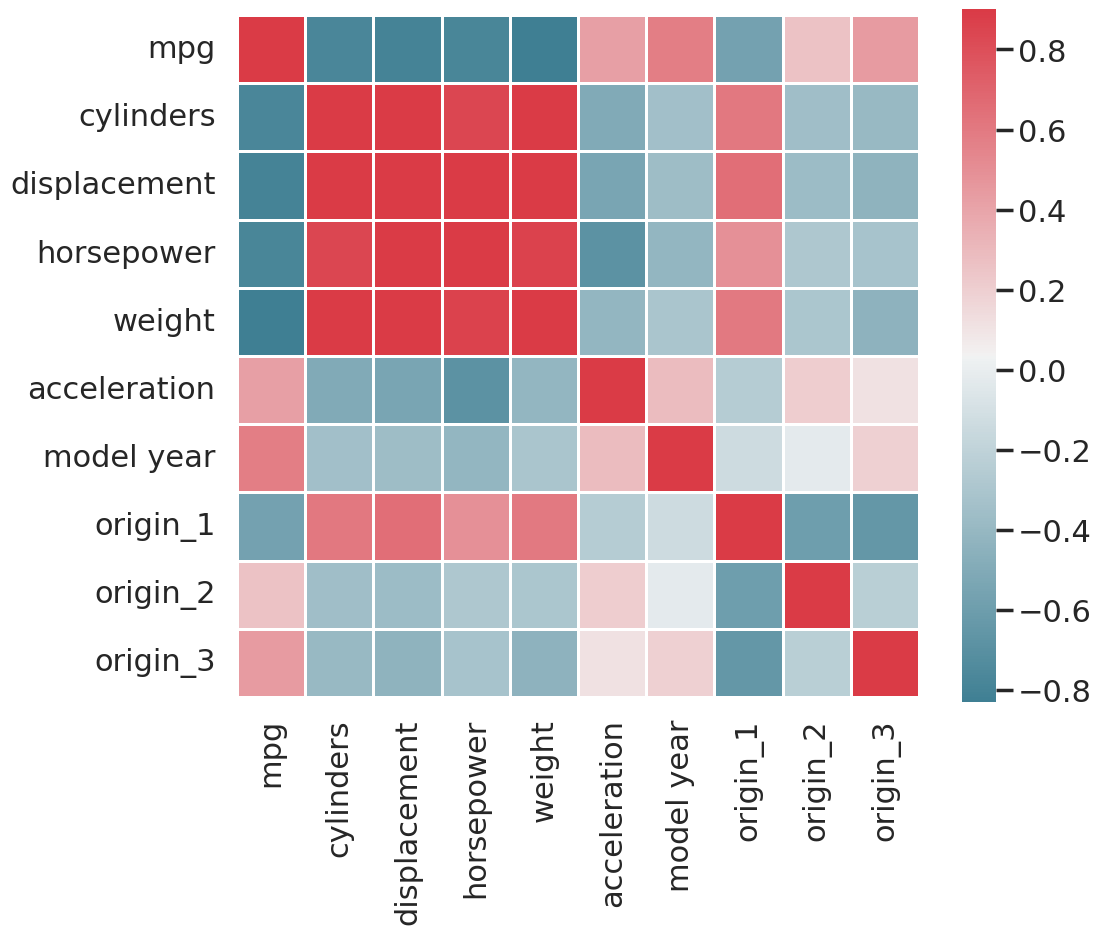

In [ ]:
#Visualize Correlation

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,
            cmap=cmap,
            vmax=.9,
            square=True,
            linewidths=1,
            ax=ax)

## Step 4: Build the Model

### Split the Dataset into Train and Test

In [ ]:
#check for null values
df_dummy.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin_1        0
origin_2        0
origin_3        0
dtype: int64

In [ ]:
#drop all null values
df_dummy.dropna(axis=0, inplace=True)

#assign independent and dependent variables
y = df_dummy['cylinders']
X = df_dummy.drop('cylinders', axis=1)

# convert to numpy array
X = np.array(X)
y = np.array(y)

# split into X_train and X_test

x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=123)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(313, 9) (79, 9) (313,) (79,)


##Step 5: Scale the Dataset

In [ ]:
#NOTE: Only scale the predictor variables, NOT the target variable

# Instantiate the Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit to the TRAIN set
scaler.fit(x_train)

# Apply to the TRAIN set
x_train_scaled = scaler.transform(x_train)

# Apply to the TEST set
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_train_scaled

array([[-1.23465401,  2.50215943,  3.04482381, ...,  0.78851865,
        -0.45661166, -0.51692019],
       [ 1.34439466, -1.01973236, -0.98308771, ..., -1.26820083,
        -0.45661166,  1.93453463],
       [ 0.04845478, -0.68476983,  0.18630596, ..., -1.26820083,
         2.19004482, -0.51692019],
       ...,
       [ 2.20407755, -1.02930272, -0.98308771, ..., -1.26820083,
        -0.45661166,  1.93453463],
       [ 0.30507654, -0.34980729, -0.28145151, ...,  0.78851865,
        -0.45661166, -0.51692019],
       [ 0.94663093, -0.77090305, -0.46335719, ...,  0.78851865,
        -0.45661166, -0.51692019]])

### Step 6: Instantiate the model and train the Model

In [ ]:
#Instantiate the Linear Regression Algorit
linreg = linear_model.LinearRegression()

#Train the Model
linreg.fit(x_train_scaled, y_train)

LinearRegression()

## Validate the Model

In [ ]:
# Predict the values of house prices
y_pred = linreg.predict(x_test_scaled)
y_pred

array([6.56626286, 3.75499516, 7.16492449, 4.38531222, 4.22424402,
       5.97240607, 4.3499736 , 6.3994188 , 7.43480178, 3.86511778,
       7.95598357, 5.02080957, 8.39165071, 3.74912116, 7.98001872,
       5.09804147, 4.17382108, 8.84065517, 7.3057272 , 7.70527577,
       5.99655088, 4.26386891, 4.81064268, 3.78880238, 3.79905746,
       7.97487077, 4.31897664, 3.88906408, 4.37357917, 3.95164361,
       5.83096703, 4.03764824, 6.08105279, 4.3235019 , 6.49577804,
       4.64640804, 3.70520925, 4.74103846, 4.35845387, 7.0005192 ,
       7.21499536, 5.93464739, 4.4858936 , 5.4789819 , 5.50426363,
       9.21943075, 5.05182112, 4.74029709, 4.22719688, 5.99581985,
       4.13720903, 3.90155023, 8.59317826, 7.13053575, 4.99027192,
       7.81067312, 8.71608708, 4.21865936, 5.4664567 , 3.81681754,
       8.638837  , 8.42092787, 4.24238016, 4.74149379, 7.4206494 ,
       3.87523758, 3.94555924, 5.6145079 , 4.52040485, 5.57566358,
       4.2533016 , 3.55192627, 3.80019531, 7.9346717 , 4.28668

In [ ]:
#save the predicted values to dataframe
df_results = pd.DataFrame(y_test)

df_results['Predicted Fuel Consumption'] = y_pred

df_results

0  Predicted Fuel Consumption
0   8                    6.566263
1   4                    3.754995
2   8                    7.164924
3   4                    4.385312
4   4                    4.224244
.. ..                         ...
74  4                    4.286685
75  4                    4.309763
76  6                    5.155801
77  8                    7.938553
78  6                    5.955362

[79 rows x 2 columns]

# PERFORMANCE METRICS FOR REGRESSION
1. Mean absolute error
- The Mean Absolute Error (or MAE) is the sum of the absolute differences between predictions and actual values.
- It gives an idea of how wrong the predictions were.
- The measure gives an idea of the magnitude of the error, but no idea of the direction (e.g. over or under predicting).


2. Mean squared error
- The Mean Squared Error (or MSE) is much like the mean absolute error in that it provides a gross idea of the magnitude of error.
- Taking the square root of the mean squared error converts the units back to the original units of the output variable and can be meaningful for description and presentation. This is called the Root Mean Squared Error (or RMSE).
- getting the variance.. then getting standard deviation (the assumption is you have normal or gaussian distribution)
3. R-squared metric
- The  𝑅2  (or R Squared) metric provides an indication of the goodness of fit of a set of predictions to the actual values.
- It is also called the coefficient of determination. This is a value between 0 for no-fit and 1 for perfect fit
- how different is your predicted value to the actual value
- residual or error looks into the variance of targets and feature not unlike MSE or MAE which looks only on the target

In [ ]:
#Measure the performance of the model
r2 = r2_score(y_test, y_pred) * 100
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Performance of Linear Regression")
print(("r2: %.2f") % r2)
print(("mae: %.2f") % mae)
print(("mse: %.2f") % mse)
print(("rmse: %.2f") % rmse)

Performance of Linear Regression
r2: 90.55
mae: 0.41
mse: 0.27
rmse: 0.52


# Using Artificial Neural Network for Prediction


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [ ]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [ ]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle,
    optimizer=Adam(learning_rate=learning_rate),
    metrics=[msle]
)
# train the model
history = model.fit(x_train_scaled, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/100
4/4 [==============================] - 1s 71ms/step - loss: 1.2846 - mean_squared_logarithmic_error: 1.2685 - val_loss: 0.5014 - val_mean_squared_logarithmic_error: 0.5014
Epoch 2/100
4/4 [==============================] - 0s 19ms/step - loss: 0.2962 - mean_squared_logarithmic_error: 0.2926 - val_loss: 0.2020 - val_mean_squared_logarithmic_error: 0.2020
Epoch 3/100
4/4 [==============================] - 0s 17ms/step - loss: 0.1547 - mean_squared_logarithmic_error: 0.1525 - val_loss: 0.0431 - val_mean_squared_logarithmic_error: 0.0431
Epoch 4/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0938 - mean_squared_logarithmic_error: 0.0940 - val_loss: 0.0775 - val_mean_squared_logarithmic_error: 0.0775
Epoch 5/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0432 - mean_squared_logarithmic_error: 0.0430 - val_loss: 0.0542 - val_mean_squared_logarithmic_error: 0.0542
Epoch 6/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0528 -

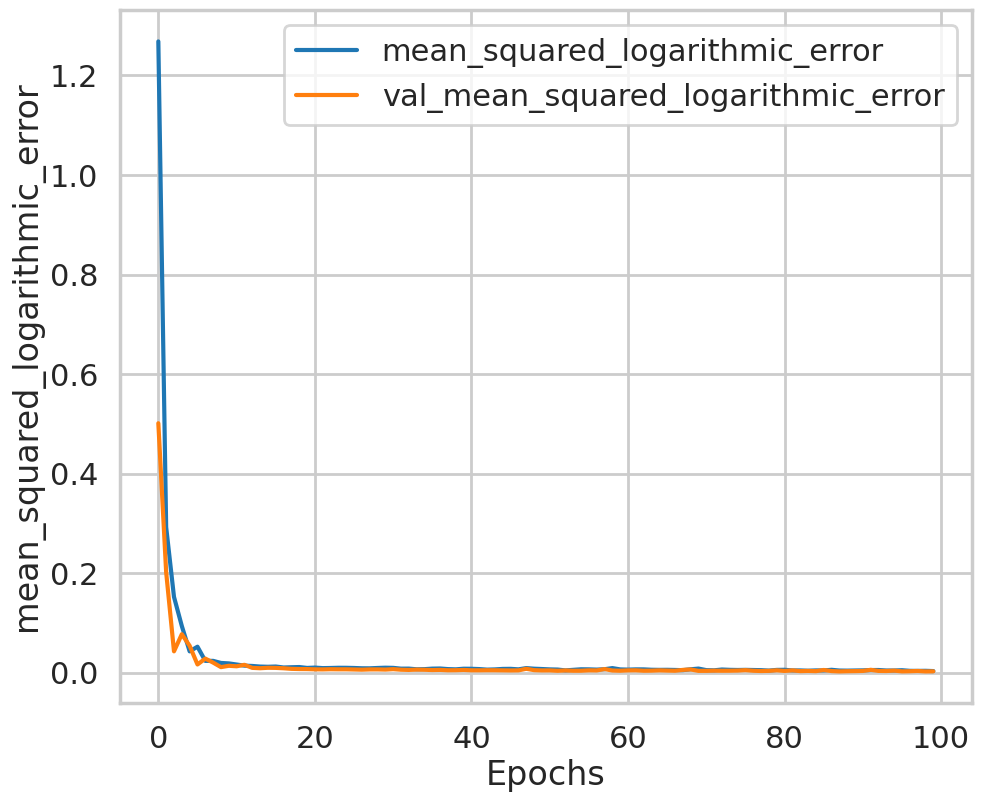

In [ ]:
#After training, plot the history.

def plot_history(history, key):
  f, ax = plt.subplots(figsize=(11, 9))
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [ ]:
# Predict the values
y_pred_nn = model.predict(x_test_scaled)
y_pred_nn

3/3 [==============================] - 0s 4ms/step


array([[6.519018 ],
       [4.06598  ],
       [7.4566402],
       [4.0276785],
       [4.0658712],
       [5.981614 ],
       [3.9390073],
       [6.263925 ],
       [7.5912256],
       [3.9784365],
       [7.501096 ],
       [5.02793  ],
       [7.648718 ],
       [4.086112 ],
       [7.7242823],
       [5.487487 ],
       [4.1674347],
       [7.9166293],
       [7.4759245],
       [8.041782 ],
       [6.1925874],
       [4.0175495],
       [4.464763 ],
       [3.8858647],
       [4.089502 ],
       [7.581134 ],
       [4.188821 ],
       [4.129487 ],
       [4.1825128],
       [4.120205 ],
       [6.9596834],
       [4.0744042],
       [5.939719 ],
       [4.138652 ],
       [5.760772 ],
       [4.273986 ],
       [4.193681 ],
       [4.5411644],
       [4.1491117],
       [7.7587514],
       [7.4924784],
       [6.0813365],
       [4.2495093],
       [4.75264  ],
       [5.4730887],
       [7.668294 ],
       [5.3075566],
       [4.2067766],
       [4.2521963],
       [5.980281 ],


In [ ]:
df_results1 = pd.DataFrame(y_test)

df_results1["Predicted House Value in NN"] = y_pred_nn

df_results1

0  Predicted House Value in NN
0   8                     6.519018
1   4                     4.065980
2   8                     7.456640
3   4                     4.027678
4   4                     4.065871
.. ..                          ...
74  4                     4.259288
75  4                     3.999116
76  6                     5.101805
77  8                     7.625518
78  6                     5.955780

[79 rows x 2 columns]

In [ ]:
df_results2 = df_results1

df_results2["Predicted Value in LR"] = y_pred
#df_results[y_pred_nn, y_pred ] = (colnames = "Predicted Sales in NN", "Predicted Sales in lr")
df_results2

0  Predicted House Value in NN  Predicted Value in LR
0   8                     6.519018               6.566263
1   4                     4.065980               3.754995
2   8                     7.456640               7.164924
3   4                     4.027678               4.385312
4   4                     4.065871               4.224244
.. ..                          ...                    ...
74  4                     4.259288               4.286685
75  4                     3.999116               4.309763
76  6                     5.101805               5.155801
77  8                     7.625518               7.938553
78  6                     5.955780               5.955362

[79 rows x 3 columns]

In [ ]:
#Measure the performance of the model
r2 = r2_score(y_test, y_pred) * 100
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('Performance Evaluation - Linear Regression')
print(("r2: %.2f") %r2)
print(("mae: %.2f") %mae)
print(("mse: %.2f") %mse)
print(("rmse: %.2f") %rmse)

#Measure the performance of the model
r2 = r2_score(y_test, y_pred) * 100
mae = mean_absolute_error(y_test, y_pred_nn)
mse = mean_squared_error(y_test, y_pred_nn)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_nn))


print('Performance Evaluation - Neural Network')
print(("r2: %.2f") %r2)
print(("mae: %.2f") %mae)
print(("mse: %.2f") %mse)
print(("rmse: %.2f") %rmse)

Performance Evaluation - Linear Regression
r2: 90.55
mae: 0.41
mse: 0.27
rmse: 0.52
Performance Evaluation - Neural Network
r2: 90.55
mae: 0.32
mse: 0.20
rmse: 0.44
